In [21]:
!pip install pandas 
!pip install seaborn   

In [22]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

data_path = "../Data/loan_data.csv"   
df = pd.read_csv(data_path)
df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1


In [23]:
df.shape
df.columns


Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

In [24]:

df.head()


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1


In [25]:
df.isnull().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [26]:
df['loan_paid_back'].value_counts(), df['loan_paid_back'].value_counts(normalize=True)

(loan_paid_back
 1    214068
 0     54046
 Name: count, dtype: int64,
 loan_paid_back
 1    0.798422
 0    0.201578
 Name: proportion, dtype: float64)

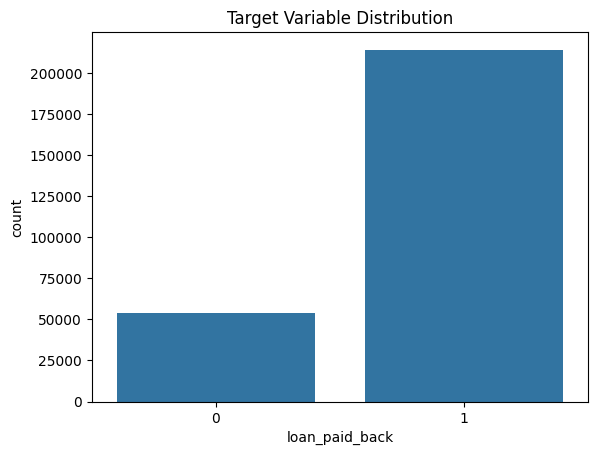

In [27]:
sns.countplot(data=df, x="loan_paid_back")
plt.title("Target Variable Distribution")
plt.show()

In [28]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,268114.0,134056.500000,77397.989374,0.000,67028.250,134056.500,201084.750,268113.000
annual_income,268114.0,48203.659176,26735.817913,6002.430,27897.190,46552.490,60981.320,393381.740
debt_to_income_ratio,268114.0,0.120764,0.068750,0.011,0.072,0.096,0.156,0.577
credit_score,268114.0,680.831732,55.404553,395.000,646.000,682.000,719.000,849.000
loan_amount,268114.0,15028.884002,6932.802588,500.910,10281.410,15011.150,18872.210,48959.950
interest_rate,268114.0,12.357615,2.008781,3.660,10.990,12.370,13.680,20.840
loan_paid_back,268114.0,0.798422,0.401180,0.000,1.000,1.000,1.000,1.000


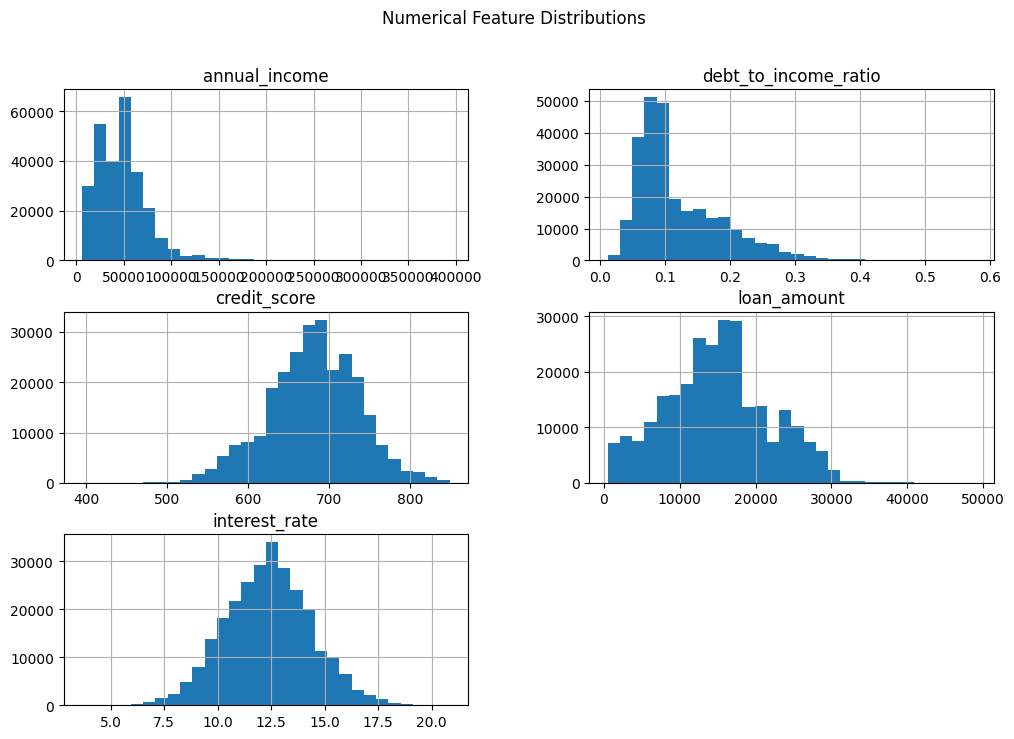

In [29]:
num_cols = ['annual_income','debt_to_income_ratio','credit_score','loan_amount','interest_rate']

df[num_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Numerical Feature Distributions")
plt.show()


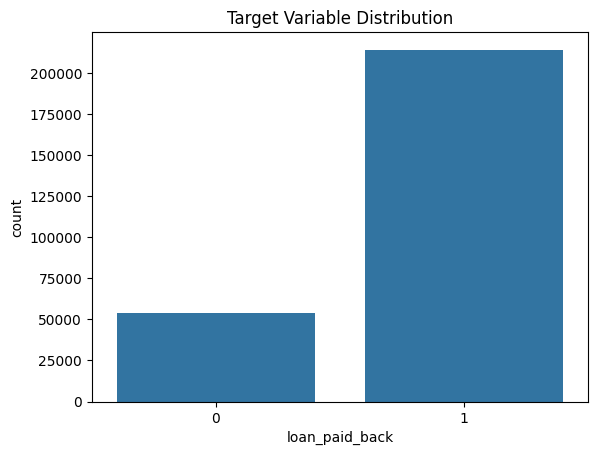

In [30]:
sns.countplot(data=df, x="loan_paid_back")
plt.title("Target Variable Distribution")
plt.show()


In [31]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(col, "→ uniques:", df[col].nunique())
    print(df[col].value_counts().head(5))
    print("-----")


gender → uniques: 3
gender
Female    138314
Male      128106
Other       1694
Name: count, dtype: int64
-----
marital_status → uniques: 4
marital_status
Single      130461
Married     124982
Divorced      9622
Widowed       3049
Name: count, dtype: int64
-----
education_level → uniques: 5
education_level
Bachelor's     126443
High School     82559
Master's        42060
Other           12028
PhD              5024
Name: count, dtype: int64
-----
employment_status → uniques: 5
employment_status
Employed         203430
Unemployed        28235
Self-employed     23714
Retired            7422
Student            5313
Name: count, dtype: int64
-----
loan_purpose → uniques: 8
loan_purpose
Debt consolidation    146739
Other                  28783
Car                    26179
Home                   19824
Education              16526
Name: count, dtype: int64
-----
grade_subgrade → uniques: 30
grade_subgrade
C3    26198
C4    25472
C2    24430
C1    24229
C5    24130
Name: count, dtype: int64
-----

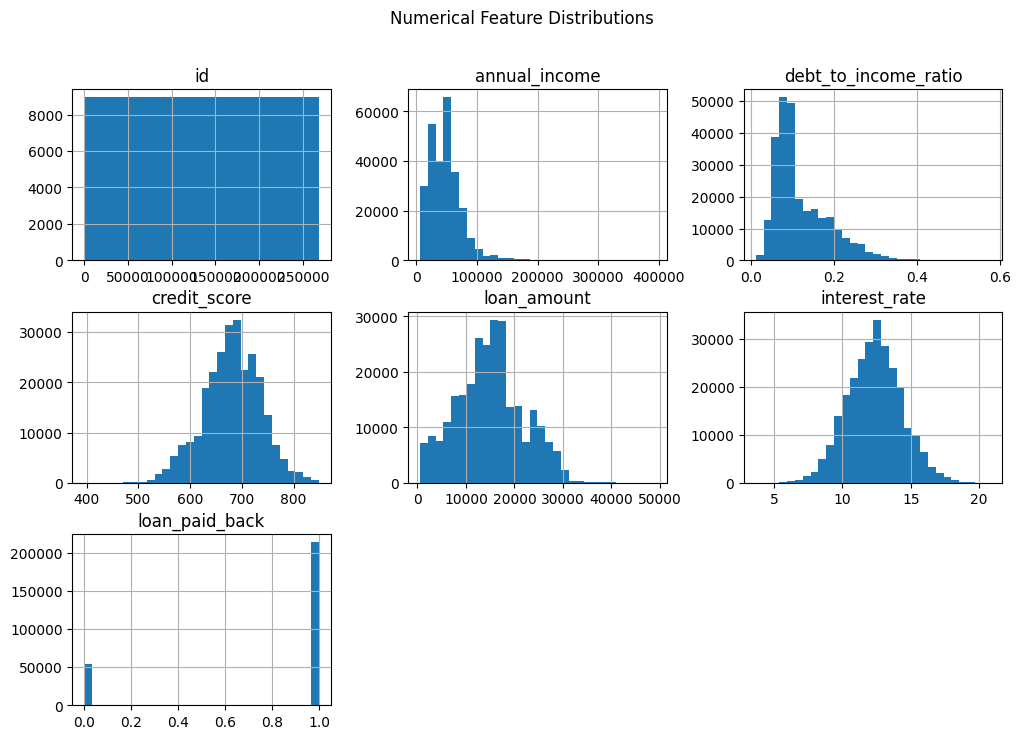

In [35]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Numerical Feature Distributions")
plt.show()


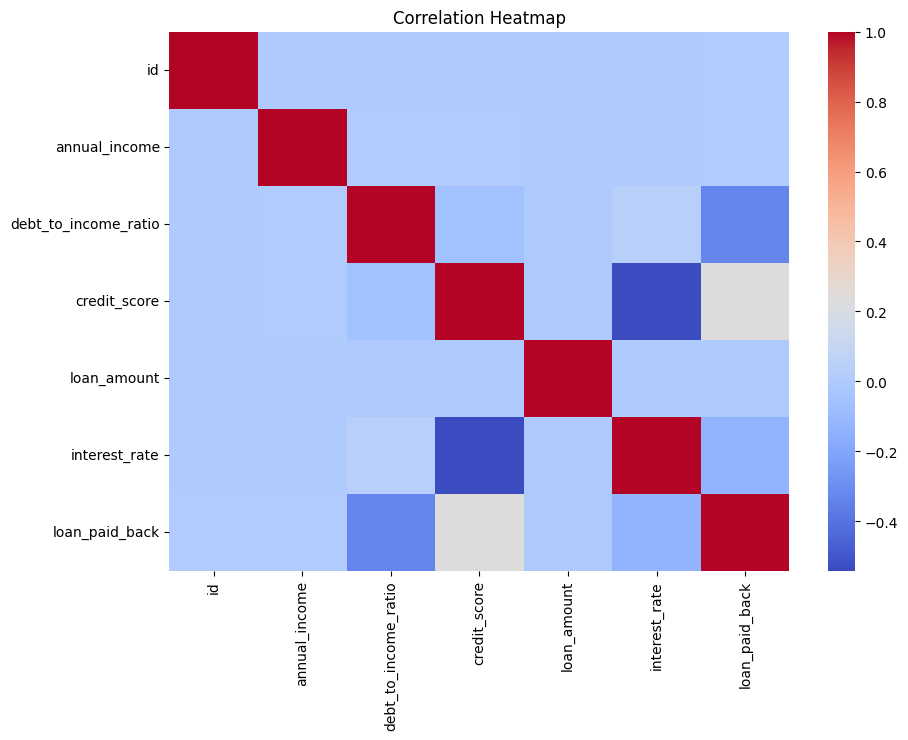

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
